In [108]:
import numpy as np
import pandas as pd
from copy import deepcopy
import json
#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# NLP modules we will use for text normalization
import re #regex 
import nltk # the natural language toolkit
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

# feature construction
from sklearn.feature_extraction.text import TfidfVectorizer #use this to create BoW matrix
import pyLDAvis.sklearn # a specialized package for topic model visualization

#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

In [109]:
# additional argument sets cut off minimum length for tokenized text at which function converts to null string.
def process_tweet(tweet_text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')
    new_words = ['u','ur',',','https',"'","i'm",'like','lol','get','one','http',
                "reeee","bro","need","tbh","ppl","wow","dude","ye","okay","ik","ep",
                 "ya","plz","need","look","idk","c",'b','imo','smh','haha',"n't",
                '.first','wtf','ta','im',"’"]
    stop_words = stop_words + (new_words)
    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    tweet_lower = tweet_text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    tweet_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", tweet_lower).strip().replace("\r", "").replace("\n", " ").replace("\t", "")
    
    
    # remove stop words and punctuations 
    tweet_norm = [x for x in word_tokenize(tweet_lower) if ((x.isalpha()) & (x not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(tweet_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(wordnet_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        tweet_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in wordnet_tagged if x[1] is not None])
        return tweet_norm


In [110]:
# Opening JSON file
filepath = 'user_data/' + 'channel_messages' + '/' + 'channel_messages' + '_messages.json'
f = open(filepath)

# returns JSON object as 
# a dictionary
data2 = json.load(f)
unreplied_message = []
# Iterating through the json
# list
for i in data2:
    try:
        if i['media'] == None:
            unreplied_message.append(i['message'])
    except:pass
# Closing file
f.close()
unreplied_messages = pd.DataFrame(unreplied_message,columns = ['text'])
unreplied_messages

,text
0,"OOF, poorly scheduled messages"
1,https://t.me/c/1179447288/67840
2,As an iPhone user this cannot stand
3,AMC has a vip line for snacks
4,Omrahn do it for the memes
...,...
51557,Jamshid watching that last game
51558,i missed the last game
51559,That last game
51560,Did it work?


In [111]:
# Opening JSON file
filepath = 'messages_with_replies.json'
f = open(filepath)

# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()

In [112]:
indices = [i for i in data]
indices

['87996',
 '87992',
 '87991',
 '87989',
 '87988',
 '87987',
 '87986',
 '87985',
 '87984',
 '87983',
 '87982',
 '87981',
 '87980',
 '87979',
 '87978',
 '87977',
 '87976',
 '87975',
 '87974',
 '87973',
 '87972',
 '87971',
 '87970',
 '87969',
 '87968',
 '87967',
 '87966',
 '87965',
 '87964',
 '87963',
 '87962',
 '87961',
 '87960',
 '87959',
 '87958',
 '87957',
 '87956',
 '87955',
 '87954',
 '87953',
 '87952',
 '87951',
 '87950',
 '87949',
 '87948',
 '87947',
 '87946',
 '87945',
 '87944',
 '87943',
 '87942',
 '87941',
 '87940',
 '87939',
 '87938',
 '87937',
 '87936',
 '87935',
 '87934',
 '87933',
 '87932',
 '87931',
 '87930',
 '87929',
 '87928',
 '87927',
 '87926',
 '87925',
 '87924',
 '87923',
 '87922',
 '87921',
 '87920',
 '87919',
 '87918',
 '87917',
 '87916',
 '87915',
 '87914',
 '87912',
 '87911',
 '87910',
 '87909',
 '87908',
 '87907',
 '87906',
 '87905',
 '87904',
 '87903',
 '87902',
 '87901',
 '87900',
 '87899',
 '87898',
 '87897',
 '87896',
 '87895',
 '87894',
 '87893',
 '87892',


In [113]:
message[4045] + message[10]

'Rolo bad? Have you watched nothing!?    Medicine bad\nTom Brady bad\nRocket league bad\nFifa bad\nEuphoria bad\nMarvel bad\nPokemon bad\nTesla bad\nApple bad\n3D printing bad\nBoeing bad\nWFH bad\nSmash bros bad\nNBA bad\nBoat bad\nPrisoners bad\nCode Geass bad\nGym bad\nSleep schedule bad\nBuzz Lightyear bad\nOppenheimer bad\nDune bad\nInvincible bad\nBuffalo bad\nPhiladelphia bad\nThe Weeknd bad\nEngineering bad\nHBO Max bad\nYu Gi Oh bad\nMinecraft bad\nRolo bad\nOMRAHN VERY BAD U guys should try to get on the tik tok  '

In [114]:
def repliedMessage(id):
    global string  
    string = ' '
    message = data[id]
    try:
        if message['media'] == None:
            if message['reply_to'] != None:
                
                string  += repliedMessage(str(message['reply_to']['reply_to_msg_id'])) + ' ' + data[str(message['reply_to']['reply_to_msg_id'])]['message'] + ' '
                
    except: pass
    return string 

In [115]:
#repliedMessage('87947')
message = []
for i in indices:
    try:
        if repliedMessage(i) != '':
            if data[i]['media'] == None:
                message.append(data[i]['message'] + ' ' +repliedMessage(i))
    except:pass
        

In [116]:
message_df = pd.DataFrame(message,columns = ['text'])
message_df

,text
0,"OOF, poorly scheduled messages"
1,https://t.me/c/1179447288/67840
2,As an iPhone user this cannot stand
3,AMC has a vip line for snacks
4,Omrahn do it for the memes
...,...
51557,Jamshid watching that last game
51558,i missed the last game
51559,That last game
51560,Did it work?


In [117]:
message_df['text'][4045]

'Rolo bad? Have you watched nothing!?    Medicine bad\nTom Brady bad\nRocket league bad\nFifa bad\nEuphoria bad\nMarvel bad\nPokemon bad\nTesla bad\nApple bad\n3D printing bad\nBoeing bad\nWFH bad\nSmash bros bad\nNBA bad\nBoat bad\nPrisoners bad\nCode Geass bad\nGym bad\nSleep schedule bad\nBuzz Lightyear bad\nOppenheimer bad\nDune bad\nInvincible bad\nBuffalo bad\nPhiladelphia bad\nThe Weeknd bad\nEngineering bad\nHBO Max bad\nYu Gi Oh bad\nMinecraft bad\nRolo bad\nOMRAHN VERY BAD '

In [118]:
message_df_copy = message_df.copy(deep=True)

In [119]:
message_df['text'] = message_df['text'].apply(process_tweet, args = [9])

In [120]:
message_df['text']

0         
1         
2         
3         
4         
        ..
51557     
51558     
51559     
51560     
51561     
Name: text, Length: 51562, dtype: object

In [121]:
message_df_copy

,text
0,"OOF, poorly scheduled messages"
1,https://t.me/c/1179447288/67840
2,As an iPhone user this cannot stand
3,AMC has a vip line for snacks
4,Omrahn do it for the memes
...,...
51557,Jamshid watching that last game
51558,i missed the last game
51559,That last game
51560,Did it work?


In [122]:
message_df_clean = message_df.copy(deep=True)
message_df_clean = message_df_clean[message_df_clean['text'] != '']

In [123]:
corpus = message_df_clean['text']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<3826x5319 sparse matrix of type '<class 'numpy.float64'>'
	with 49876 stored elements in Compressed Sparse Row format>

In [124]:
len(vectorizer.get_feature_names())

5319

In [125]:
topic_model = NMF(n_components = 5)
topic_model.fit(X_train)

NMF(n_components=5)

In [126]:
# to get H
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 5319)
Shape of H is (3826, 5)
Shape of X_train is (3826, 5319)


In [127]:
W[4]

array([0.        , 0.00061729, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [128]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['even', 'something', 'cause', 'much', 'man', 'marvel', 'thing', 'know', 'time', 'fuck', 'see', 'guy', 'group', 'shit', 'good', 'people', 'want', 'show', 'get', 'say', 'go', 'think', 'movie', 'make', 'watch']


THE TOP 10 WORDS FOR TOPIC #1
['goal', 'back', 'need', 'ball', 'bring', 'shit', 'let', 'bren', 'rank', 'stimitz', 'fuck', 'dq', 'job', 'mid', 'defense', 'offense', 'jam', 'brendan', 'omrahn', 'jalil', 'hassib', 'john', 'jamshid', 'greg', 'mattee']


THE TOP 10 WORDS FOR TOPIC #2
['wisdom', 'change', 'quizarium', 'duration', 'side', 'omrahn', 'lose', 'weirdly', 'bright', 'language', 'jalil', 'greg', 'topic', 'start', 'nobody', 'choose', 'question', 'winner', 'bot', 'enjoy', 'rate', 'game', 'please', 'point', 'answer']


THE TOP 10 WORDS FOR TOPIC #3
['reason', 'literally', 'ball', 'christian', 'fifa', 'good', 'give', 'boeing', 'pokemon', 'player', 'apple', 'tesla', 'brady', 'euphoria', 'tom', 'wfh', 'medicine', 'printing', 'rocket', 'nba', 'league', 

In [129]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

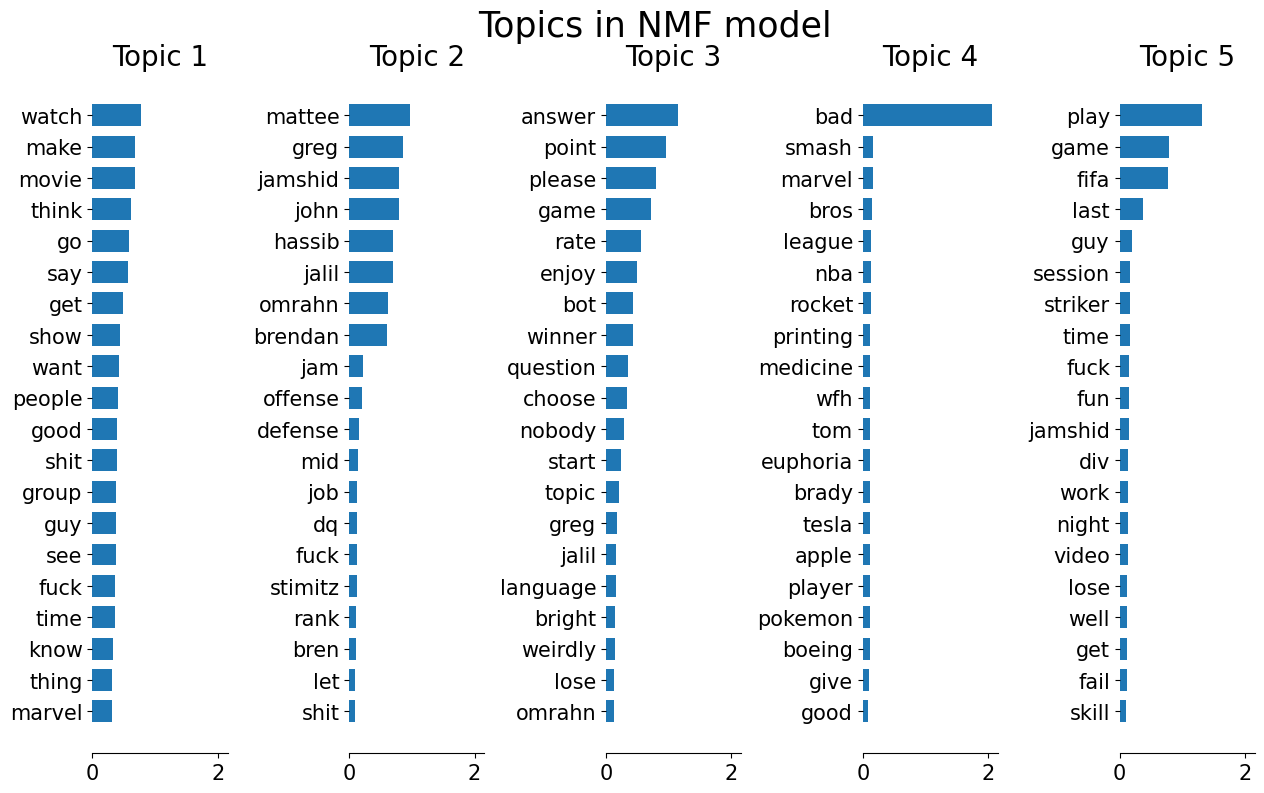

In [130]:
topic_word_plot()

In [131]:
valid_messages = message_df_clean.index.unique()
print(valid_messages)

Int64Index([   15,    70,    71,    86,    94,    96,    98,   109,   111,
              155,
            ...
            51360, 51362, 51363, 51379, 51383, 51386, 51458, 51468, 51475,
            51536],
           dtype='int64', length=3826)


In [135]:
topic_name_dict = {0: 'Entertainment', 1: 'quizzarium', 
                   2: 'Games', 3: 'Entertainment', 
                   4: 'bad'}

In [136]:
# takes in list of documents and plots topic weight vectors for each document
def tweet_topbreakdown(locator):

    print(unreplied_messages.loc[locator].text)
    int_index = message_df_clean.index.get_loc(locator)

    topic_keys = topic_name_dict.values()
    zipped_tuple = list(zip(topic_keys, list(H[int_index,:])))

    topic_breakdown = pd.DataFrame(zipped_tuple, columns = ['Topic', 'Weight']).set_index(['Topic'])
    topic_breakdown['Normalized weight'] = topic_breakdown['Weight']/topic_breakdown['Weight'].sum()

    sns.barplot(y = topic_breakdown.index, x = 'Normalized weight', data = topic_breakdown)
    plt.title("Distribution of topics for message no. " + str(locator))
    plt.show()

    return topic_breakdown

Lelouch takes over the royal family by killing his father
He then teams up with suzaku to take over the world
Everyone hates Lelouch 
 suzaku wears the zero mask 
Kills lelouch 
World peace


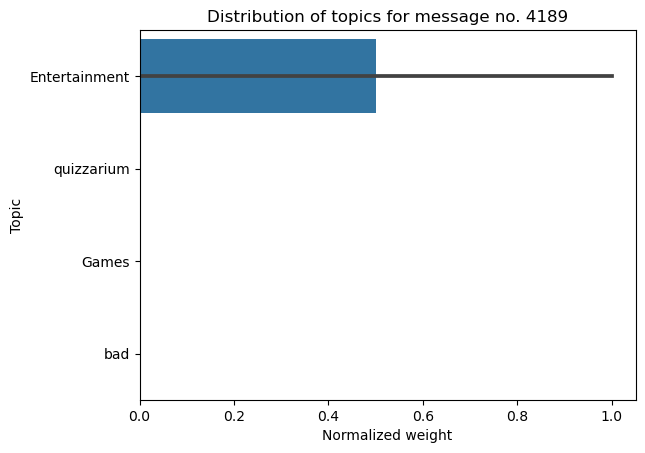

Either way i feel like the money used to research the vaccine could’ve gone to better things


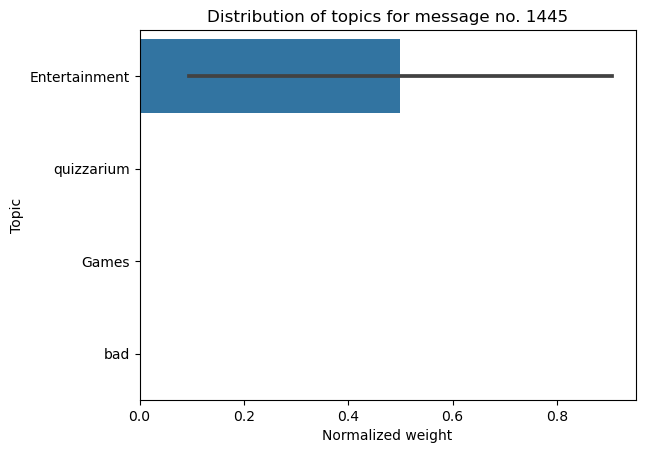

I feel like this is a natural consequence of the cost of living going up year after year and life expectancy increasing


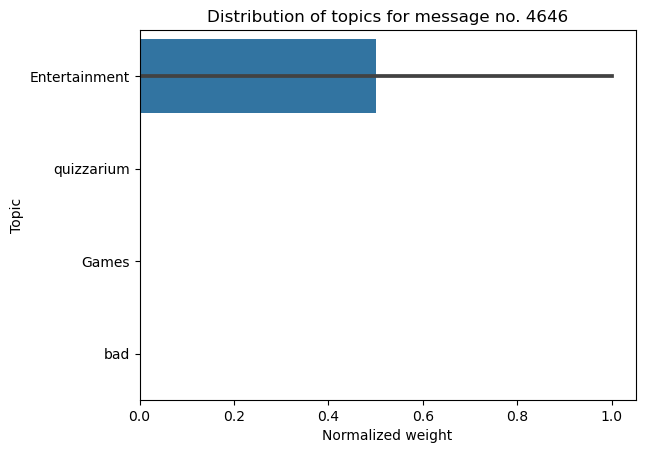

If John wasn’t in the gw we would’ve watched the entire list


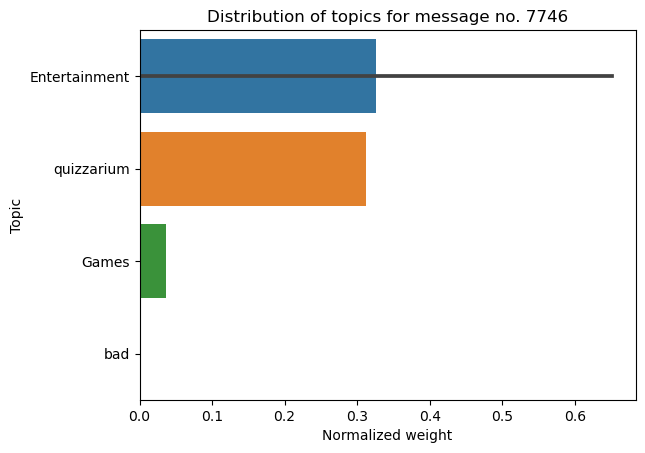

That guys actions cant simply be bought


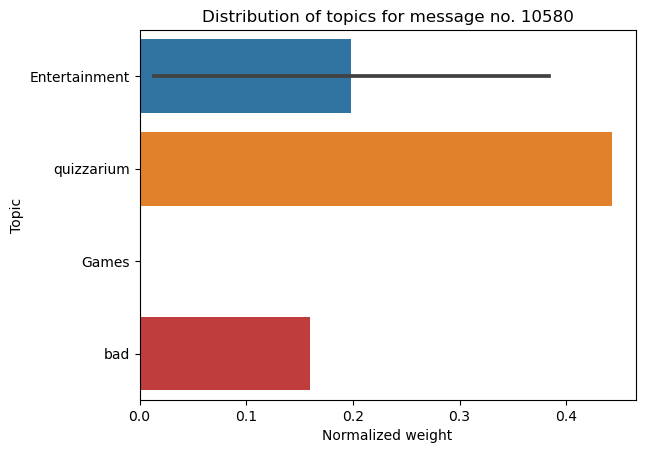

In [137]:
tweet_loc_list = [valid_messages[400],valid_messages[99],
                  valid_messages[500],valid_messages[750],valid_messages[900]]
#900 is hilarious
g = list(map(tweet_topbreakdown, tweet_loc_list))


In [91]:
og_message

NameError: name 'og_message' is not defined

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [ ]:
# for each document takes the topic with highest weight and assigns document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of COVID-19 tweet topic segmentation')
plt.show()